# Credit Card Fraud Detction

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn --quiet

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [3]:
# 2. Load Dataset
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# 3. Explore Dataset
print("Original class distribution:")
print(df['Class'].value_counts())

Original class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


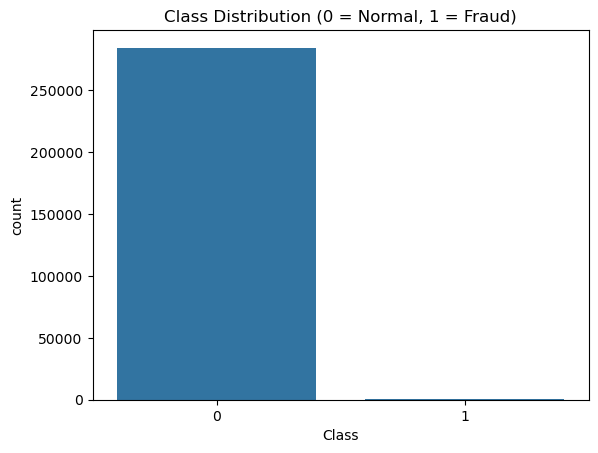

In [5]:
# 4. Visualize Class Distribution
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")
plt.show()

In [21]:
# Separate fraud and non-fraud
fraud_df = df[df['Class'] == 1]
nonfraud_df = df[df['Class'] == 0]


In [22]:
print(f"Number of fraud samples: {len(fraud_df)}")
print(f"Number of non-fraud samples: {len(nonfraud_df)}")

Number of fraud samples: 492
Number of non-fraud samples: 284315


In [23]:
# Undersample non-fraud to match fraud count
nonfraud_sampled = nonfraud_df.sample(n=len(fraud_df), random_state=42)

In [24]:
# Combine balanced data
balanced_df = pd.concat([fraud_df, nonfraud_sampled])

In [25]:
# Shuffle dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [26]:
print("Balanced dataset class distribution:")
print(balanced_df['Class'].value_counts())

Balanced dataset class distribution:
Class
0    492
1    492
Name: count, dtype: int64


In [12]:
print("\nBalanced class distribution after SMOTE:")
print(pd.Series(y_train_bal).value_counts())


Balanced class distribution after SMOTE:
Class
0    6988
1    6988
Name: count, dtype: int64


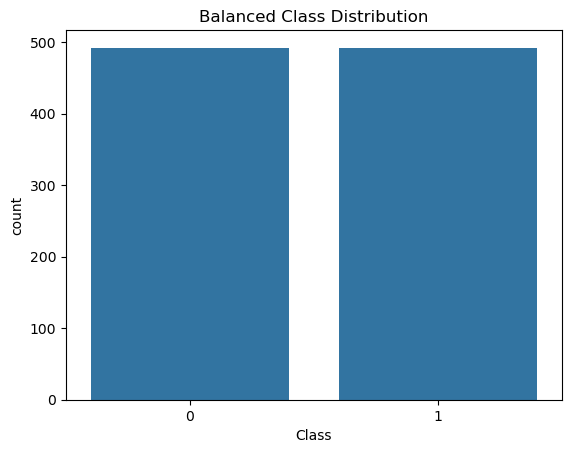

In [27]:
# Visualize balanced class distribution
sns.countplot(x='Class', data=balanced_df)
plt.title("Balanced Class Distribution")
plt.show()

In [28]:
# Prepare features and target
X = balanced_df.drop(['Class', 'Time'], axis=1)
y = balanced_df['Class']

In [29]:
# Standardize 'Amount'
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1,1))

In [30]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [31]:
# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("Training model...")
model.fit(X_train, y_train)
print("Training complete!")

Training model...
Training complete!


In [32]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[144   4]
 [ 14 134]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       148
           1       0.97      0.91      0.94       148

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



In [33]:
# ROC AUC score
y_proba = model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.9780


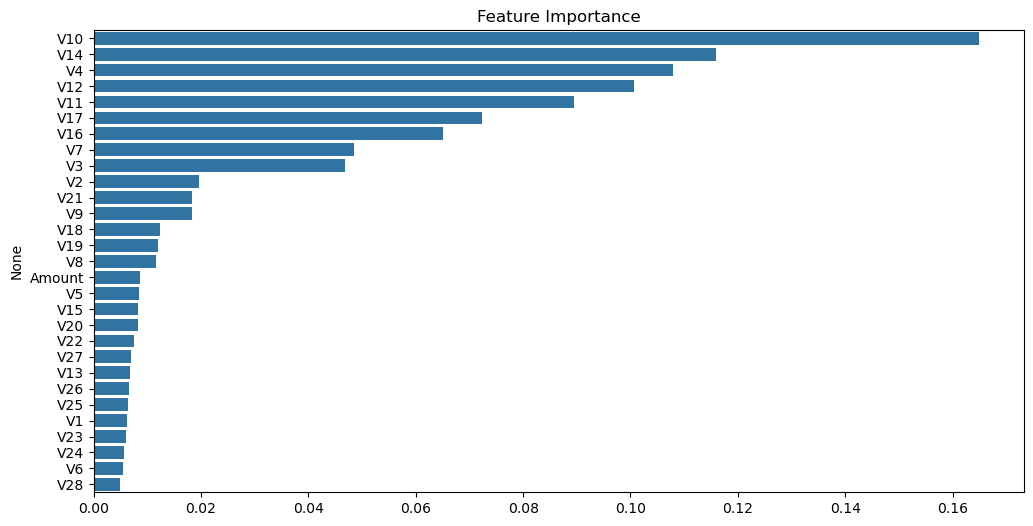

In [34]:
# Plot feature importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance")
plt.show()